In [1]:
%load_ext autoreload
%autoreload 2

In [ ]:
import matplotlib.pyplot as plt # type: ignore

In [4]:
from dspy.hdb import get_dataset

In [22]:
RCS = [f"{coin}USDT" for coin in ["BTC", "ETH", "SOL", "DOGE", "LINK"]]
TIMES = ['250401.000100', '250430.215000']

# <font color="grey">Data loading and handling</font>

Data is available in two forms: limit order book (LOB) and data sampled at fixed intervals (for example, seconds). The timestamps are given in nanosecond resolution as Unix timestamps, but the granularity of the data is not that fine. A simple dataloader and some helper function to convert Python datetime objects or strings of the form '240802.1450' into timestamps are provided. The 'book' data contains the bid and ask prices and volumes up to a specified depth (the maximum depth is currently 25).

In [ ]:
# At the moment, we are only concerned with data available through the Tardis dataset.
dl = get_dataset("tardis")

####  <a id='chapter1'> <font color="grey">1. Limit Order Book</font></a>

In [24]:
df = dl.load_book("BTCUSDT", TIMES, depth=10)

In [26]:
# Add human readable timestamp and mid prices
df = df.ds.add_datetime('ts')
df.head()

ts,ts_local,asks[0].price,asks[0].amount,bids[0].price,bids[0].amount,asks[1].price,asks[1].amount,bids[1].price,bids[1].amount,asks[2].price,asks[2].amount,bids[2].price,bids[2].amount,asks[3].price,asks[3].amount,bids[3].price,bids[3].amount,asks[4].price,asks[4].amount,bids[4].price,bids[4].amount,asks[5].price,asks[5].amount,bids[5].price,bids[5].amount,asks[6].price,asks[6].amount,bids[6].price,bids[6].amount,asks[7].price,asks[7].amount,bids[7].price,bids[7].amount,asks[8].price,asks[8].amount,bids[8].price,bids[8].amount,asks[9].price,asks[9].amount,bids[9].price,bids[9].amount,dts
i64,i64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,datetime[ns]
1743465660040000000,1743465660042000000,82460.7,1.969,82460.6,12.12,82460.8,0.034,82460.5,0.023,82460.9,0.002,82460.3,0.003,82461.4,0.002,82460.2,0.002,82462.0,0.041,82460.0,0.065,82462.2,0.002,82459.4,0.004,82462.4,0.069,82459.2,0.048,82462.5,0.012,82459.0,0.008,82462.6,0.002,82458.2,0.225,82463.1,0.002,82458.1,0.2,2025-04-01 00:01:00.040
1743465660091000000,1743465660093780000,82460.7,1.969,82460.6,12.033,82460.8,0.034,82460.5,0.02,82460.9,0.002,82460.3,0.003,82461.4,0.002,82460.2,0.002,82462.0,0.041,82460.0,0.065,82462.2,0.002,82459.4,0.004,82462.4,0.069,82459.2,0.048,82462.5,0.012,82459.1,0.003,82462.6,0.002,82459.0,0.008,82463.1,0.002,82458.2,0.225,2025-04-01 00:01:00.091
1743465660144000000,1743465660146071000,82460.7,1.969,82460.6,11.936,82460.8,0.034,82460.5,0.02,82460.9,0.002,82460.3,0.003,82461.4,0.002,82460.2,0.002,82462.0,0.041,82460.0,0.065,82462.2,0.002,82459.4,0.004,82462.4,0.069,82459.2,0.048,82462.5,0.012,82459.0,0.008,82462.6,0.002,82458.2,0.225,82463.1,0.002,82458.1,0.203,2025-04-01 00:01:00.144
1743465660197000000,1743465660199488000,82460.7,1.113,82460.6,11.938,82460.8,0.034,82460.5,0.02,82460.9,0.002,82460.3,0.003,82461.4,0.002,82460.2,0.002,82462.2,0.002,82460.0,0.113,82462.4,0.069,82459.4,0.004,82462.5,0.012,82459.2,0.048,82462.6,0.002,82459.0,0.008,82463.1,0.002,82458.2,0.225,82463.7,0.002,82458.1,0.203,2025-04-01 00:01:00.197
1743465660249000000,1743465660251591000,82460.7,0.617,82460.6,12.547,82460.8,0.034,82460.5,0.02,82460.9,0.002,82460.3,0.003,82461.4,0.002,82460.2,0.002,82462.2,0.002,82460.0,0.113,82462.4,0.069,82459.4,0.004,82462.5,0.012,82459.2,0.048,82462.6,0.002,82459.0,0.008,82463.1,0.002,82458.2,0.225,82463.7,0.002,82458.1,0.203,2025-04-01 00:01:00.249


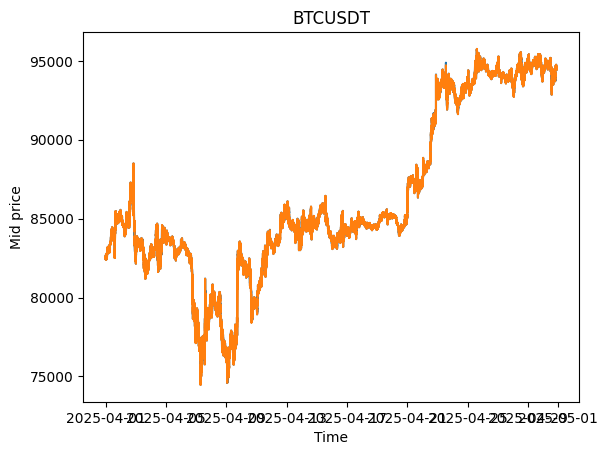

In [27]:
plt.plot(df['dts'], df['asks[0].price'], df['dts'],df['bids[0].price'])
plt.xlabel('Time')
plt.ylabel('Mid price')
plt.title(f'{RCS[0]}')
plt.show()

####  <a id='chapter2'> <font color="grey">2. Fixed-frequency data (bars)</font></a>